Linear Regression using the method of gradient descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# generating sample data
N = 21  # Number of training data points
np.random.seed(41)

x_1 = np.linspace(0, 2, N) + 0.05 * np.random.randn(N)
x_2 = np.linspace(1, 3, N) + 0.02 * np.random.randn(N)
x_3 = np.linspace(0, 4, N) + 0.08 * np.random.randn(N)

X = np.column_stack((x_1, x_2, x_3))

noise = 0.0
y = 3 * x_1 + 2 * x_2 - 7 * x_3 - 2 +  noise * np.random.standard_normal(N)           # actual model

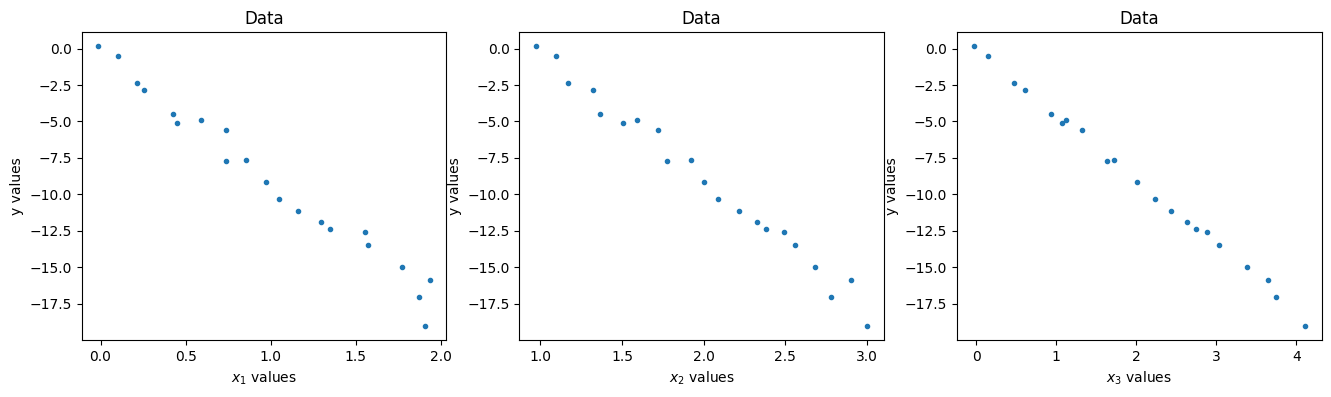

In [3]:
# visualizing the data
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
plt.scatter(x_1,y,marker = '.')
plt.title('Data')
plt.xlabel('$x_1$ values')
plt.ylabel('y values')

plt.subplot(1,3,2)
plt.scatter(x_2,y,marker = '.')
plt.title('Data')
plt.xlabel('$x_2$ values')
plt.ylabel('y values')

plt.subplot(1,3,3)
plt.scatter(x_3,y,marker = '.')
plt.title('Data')
plt.xlabel('$x_3$ values')
plt.ylabel('y values')

plt.show()

In [4]:
# defining the cost function
def cost_func(X, y, theta):
    errors = y - X @ theta
    return np.mean(errors ** 2) / 2

# defining the gradient for cost function
def grad_cost(X, y, theta):
    errors = X @ theta - y
    return (X.T @ errors) / len(y)

In [5]:
# interating to find the parameters
def gradient_descent(X, y, theta_init, learning_rate=0.1, max_iter=1000):
    X_b = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias term
    theta = np.array(theta_init)
    cost_arr = []

    for _ in range(max_iter):
        grad = grad_cost(X_b, y, theta)
        theta -= learning_rate * grad
        cost = cost_func(X_b, y, theta)
        cost_arr.append(cost)

    return theta, cost_arr

In [6]:
# running the algorithm
theta_init = np.zeros(X.shape[1] + 1)
max_iter = 10**6
best_learning_rate = 0.16981
theta, cost_arr = gradient_descent(X, y, theta_init, learning_rate = 0.16, max_iter=max_iter)
# theta, cost_arr = gradient_descent(X, y, theta_init, learning_rate = best_learning_rate, max_iter=max_iter)
print("Estimated parameters:", theta)

Estimated parameters: [-2.  3.  2. -7.]


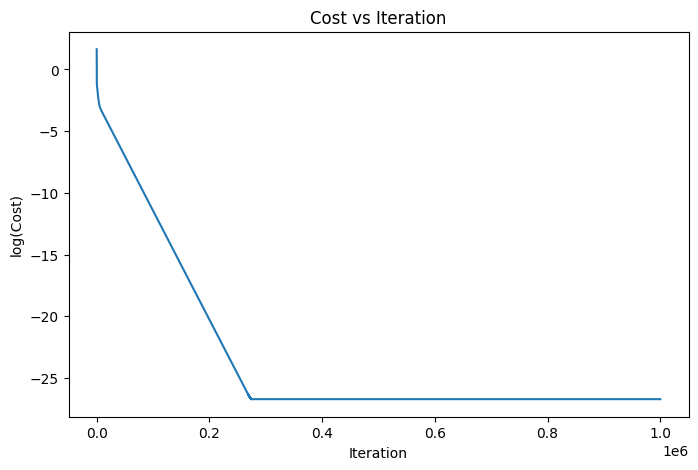

In [7]:
# visualising the Cost vs Iteration evolution
plt.figure(figsize=(8, 5))
plt.plot(range(max_iter),np.log10(cost_arr))
# try plotting this as well
# plt.plot(np.log10(range(max_iter)),np.log10(cost_arr))
plt.xlabel('Iteration')
plt.ylabel('log(Cost)')
plt.title('Cost vs Iteration')
plt.show()